In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scipy as sp
import scipy.signal as sg
from scipy import fftpack as fft
fs = 50 #sampling frequency 50Hz
df = pd.read_csv('countermovement jump x4.csv')
time = df['time']
acc = df['ax (m/s^2)']

t1 = time[1750:1889]
a1 = acc[1750:1889]


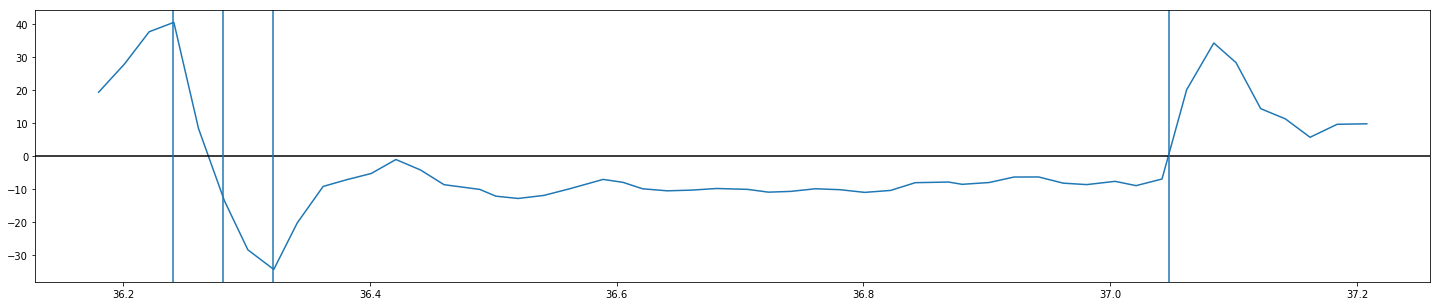

In [2]:
begin = 56
end = 108
plt.figure(figsize = (25,5))
plt.plot(t1[begin:end],a1[begin:end])
plt.axhline(0, color = 'k')
#beginning
# plt.axvline(36.269) 

#acceleration peak
plt.axvline(36.24)

#acceleration valley
plt.axvline(36.321)

plt.axvline(36.2805)

plt.axvline(37.048)

Text(0.5,0.01,'Fig. 1a. Vertical acceleration signal for a CMJ')

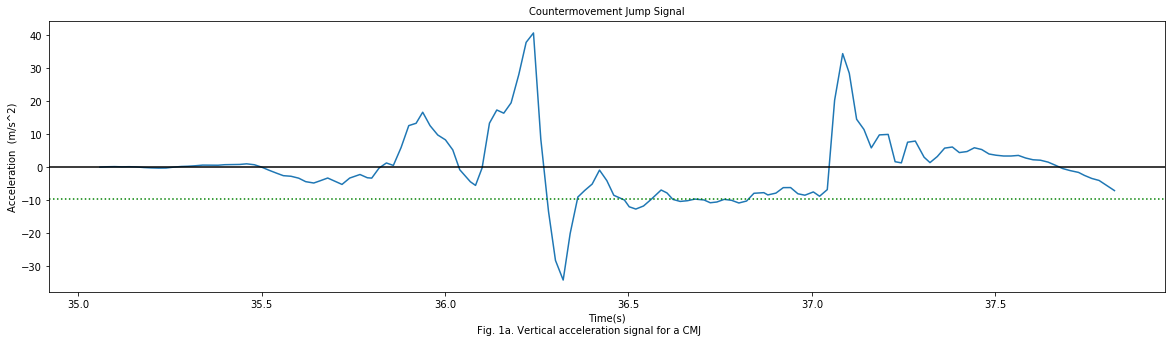

In [3]:
plt.figure(figsize=(20,5))
plt.plot(t1,a1)
#plt.plot(time[1750:1889],a[1750:1889])
plt.axhline(linestyle = '-', color = 'k')
plt.axhline(-9.8,linestyle = ':', color = 'g')
plt.title('Countermovement Jump Signal', fontsize = 10)
plt.xlabel('Time(s)')
plt.ylabel('Acceleration  (m/s^2)')
txt = 'Fig. 1a. Vertical acceleration signal for a CMJ'
plt.figtext(0.5, 0.01, txt, wrap=True,horizontalalignment='center',  fontsize=10)

Text(0.5,-0.02,'Fig. 2a. Unfiltered frequency domain signal.')

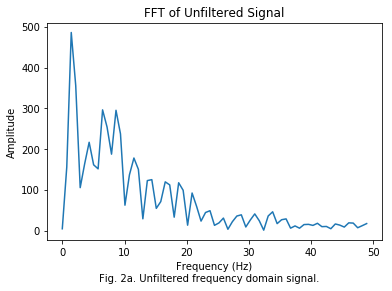

In [4]:
a1fft = fft.fft(a1)
freq = fft.fftfreq(a1.size, d = 1/(2*fs))
plt.plot(freq[0:int(len(freq)/2)], abs(a1fft[0:int(len(a1fft)/2)]))
plt.title('FFT of Unfiltered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
txt = 'Fig. 2a. Unfiltered frequency domain signal.'
plt.figtext(0.5, -0.02, txt, wrap=True,horizontalalignment='center',  fontsize=10)

Text(0.5,0.01,'Fig. 1b. Vertical acceleration signal for a CMJ, filtered by a 4th order butterworth lowpass filter with cutoff frequency at 12 Hz ')

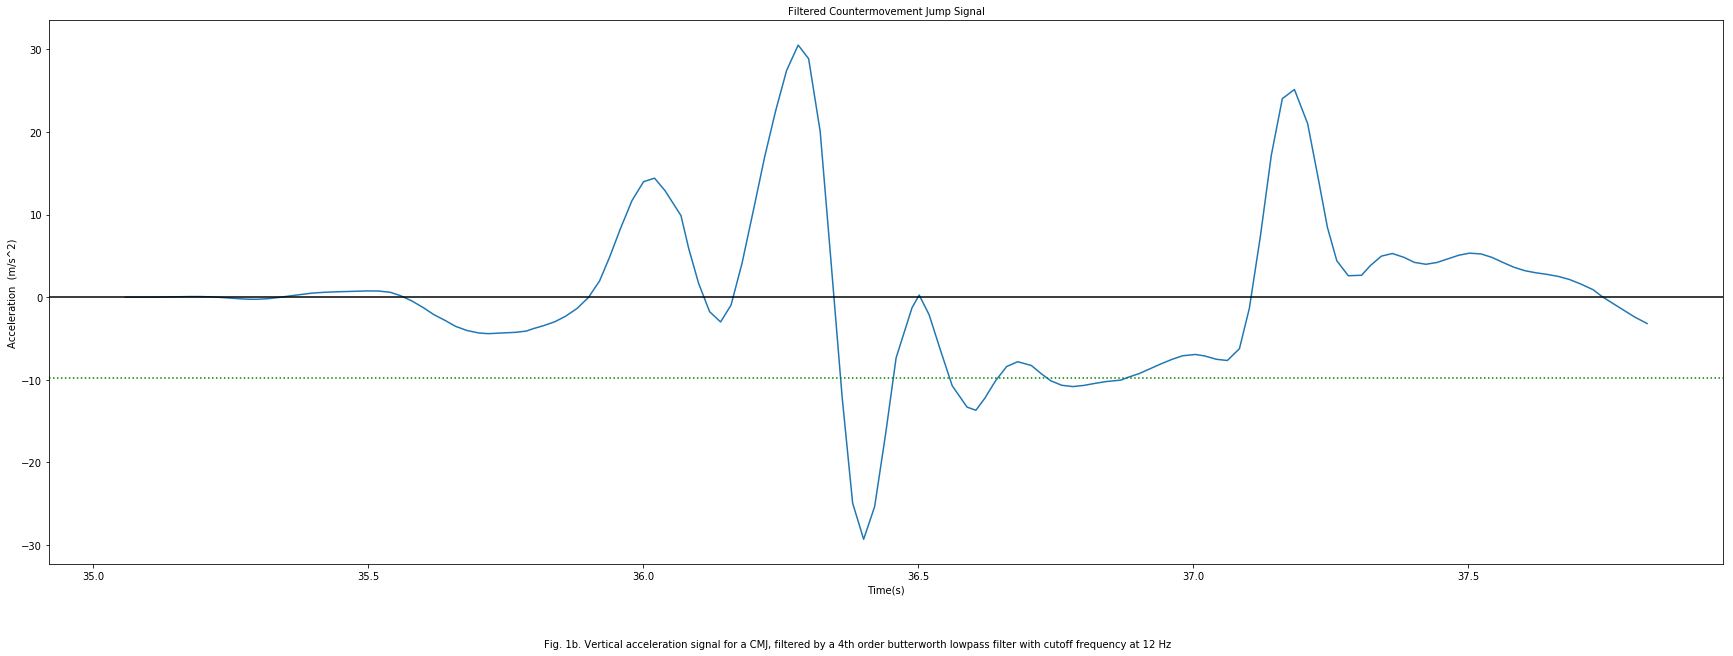

In [5]:
wc = 12/fs #normalized cutoff frequency
b, a = sg.butter(4, wc , btype = 'low') #Butterworth Lowpass Filter
a1flt = sg.lfilter(b, a, a1)

plt.figure(figsize=(30,10))
plt.plot(t1,a1flt)
plt.axhline(linestyle = '-', color = 'k')
plt.axhline(-9.8,linestyle = ':', color = 'g')
plt.title('Filtered Countermovement Jump Signal', fontsize = 10)
plt.xlabel('Time(s)')
plt.ylabel('Acceleration  (m/s^2)')
txt = 'Fig. 1b. Vertical acceleration signal for a CMJ, filtered by a 4th order butterworth lowpass filter with cutoff frequency at 12 Hz '
plt.figtext(0.5, 0.01, txt, wrap=True,horizontalalignment='center',  fontsize=10)



Text(0.5,-0.02,'Fig. 2b. Filtered frequency domain signal.')

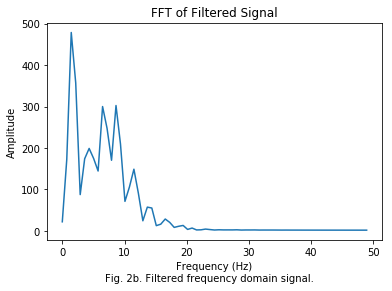

In [6]:
a1fltfft = fft.fft(a1flt)
#freq = fft.fftfreq(a1.size, d = 1/(2*fs))
plt.plot(freq[0:int(len(freq)/2)], abs(a1fltfft[0:int(len(a1fltfft)/2)]))
plt.title('FFT of Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
txt = 'Fig. 2b. Filtered frequency domain signal.'
plt.figtext(0.5, -0.02, txt, wrap=True,horizontalalignment='center',  fontsize=10)

Text(0.5,1,'Window Filtered')

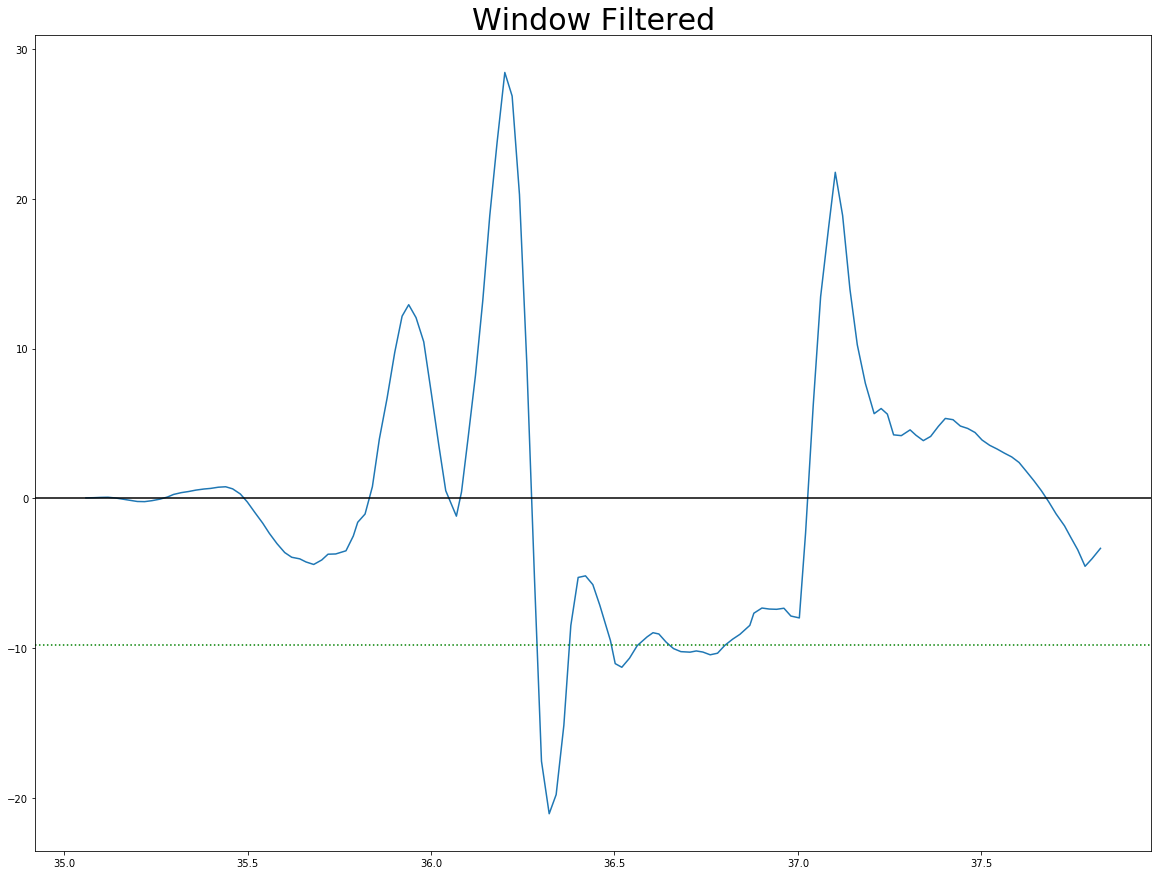

In [7]:

#doesn't work?
window = sg.get_window('rect', int(fs/10)) 
a1fil = sg.convolve(a1, window/window.sum(), mode = 'same')
plt.figure(figsize=(20,15))
plt.plot(t1,a1fil)
plt.axhline(linestyle = '-', color = 'k')
plt.axhline(-9.8,linestyle = ':', color = 'g')
plt.title('Window Filtered', fontsize = 30)

Text(0.5,1,'fft of window filtered signal')

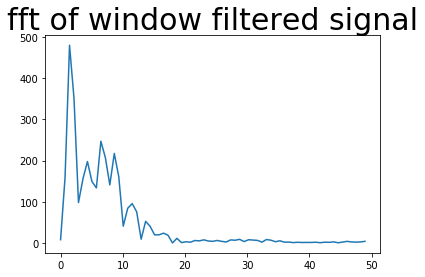

In [8]:
a1filfft = fft.fft(a1fil)
#freq = fft.fftfreq(a1.size, d = 1/(2*fs))
plt.plot(freq[0:int(len(freq)/2)], abs(a1filfft[0:int(len(a1filfft)/2)]))

plt.title("fft of window filtered signal", size = 30)

#window = sg.get_window('rect', 10)
#zeros = np.zeros(len(a1fft)-len(window))
#fltfft = np.append(window, zeros)
#filteredfft = np.multiply(fltfft, a1fft)
#plt.plot(freq[0:int(len(freq)/2)], abs(filteredfft[0:int(len(filteredfft)/2)]))

#plt.figure(figsize=(15,3))
#a1flt = fft.ifft(filteredfft)
#plt.plot(t1,a1flt)
#plt.axhline(linestyle = '-', color = 'k')
#plt.axhline(-9.8,linestyle = ':', color = 'g')

Text(0.5,1,'Impulse Response Butterworth Low pass')

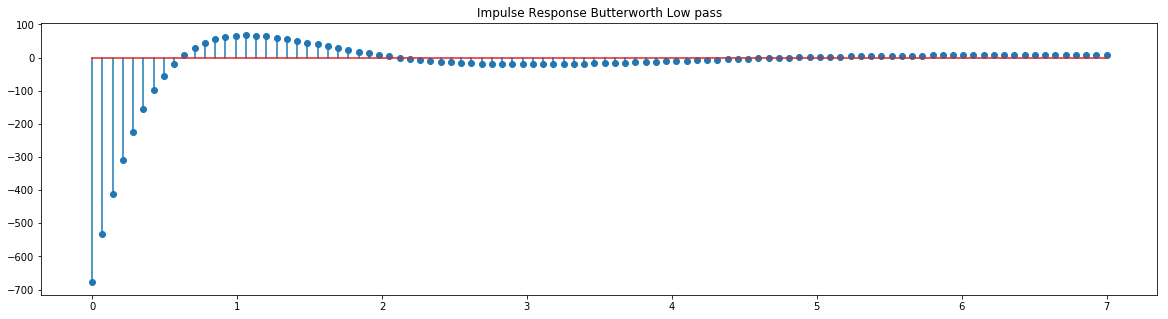

In [9]:
n, y = sg.impulse((a,b))
plt.figure(figsize = (20,5))
plt.stem(n,y)
plt.title('Impulse Response Butterworth Low pass')

Text(0,0.5,'Amplitude')

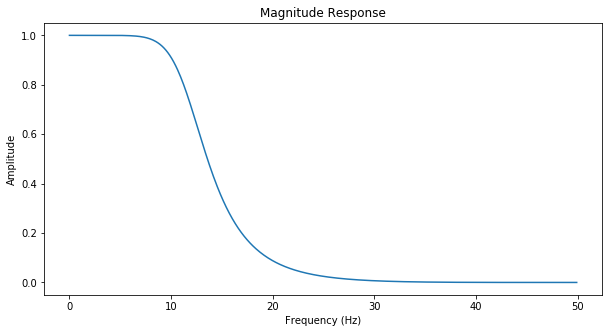

In [10]:
w,h = sg.freqz(b,a)
plt.figure(figsize = (10,5))
plt.plot(50*w/(np.pi), abs(h))
plt.title('Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

Text(0.5,1,'Pole zero of 4th order Butterworth Lowpass')

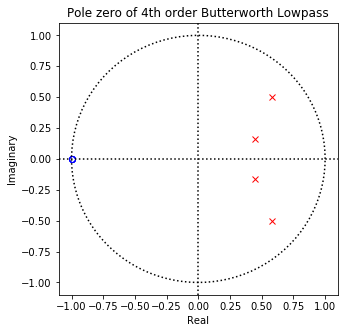

In [11]:
#pole zero plot
zeros = np.roots(b)
poles = np.roots(a)
n = np.linspace(0,2 * np.pi, 100)
plt.figure(figsize=(5,5))
plt.plot(np.real(zeros), np.imag(zeros), marker = 'o', linestyle = 'none', color = 'b', markerfacecolor = 'none')

plt.plot(np.real(poles), np.imag(poles), marker = 'x', linestyle = 'none', color = 'r', markerfacecolor = 'none')

#plt.plot([0], marker = 'o', linestyle = 'none', markerfacecolor = 'none')
plt.plot(np.cos(n), np.sin(n), linestyle = ':', color = 'k')
plt.axhline(0., linestyle = ":", color = 'k')
plt.axvline(0., linestyle = ':', color = 'k')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole zero of 4th order Butterworth Lowpass')

In [12]:
z, p, k = sg.tf2zpk(b,a)

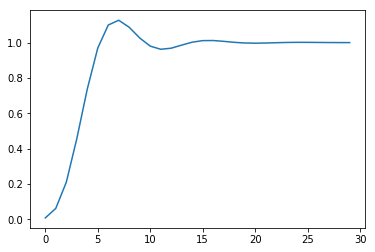

In [13]:
step_response = sg.lfilter(b,a, np.ones(30))
plt.plot(step_response)

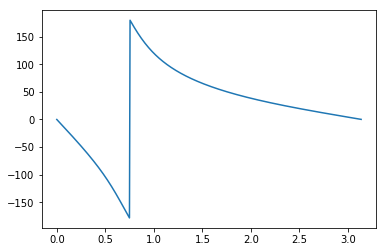

In [14]:
plt.plot(w, np.angle(h)*(180/np.pi))

Text(0.5,0,'Frequency (Hz)')

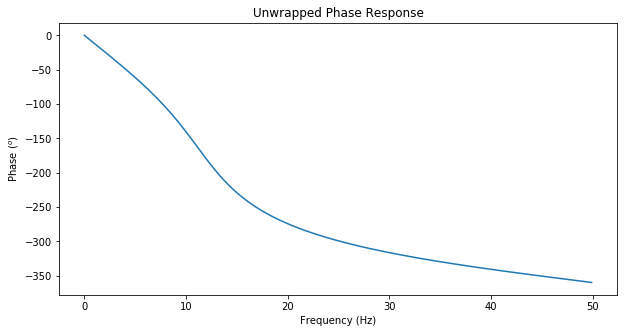

In [15]:
phaseUnwrapped = np.unwrap(np.angle(h))*(180.0/np.pi)
plt.figure(figsize = (10,5))

plt.plot(50*w/np.pi,phaseUnwrapped)
plt.ylabel('Phase ($^o$)')
plt.title('Unwrapped Phase Response')
plt.xlabel('Frequency (Hz)')

Text(0.5,0,'Frequency (Hz)')

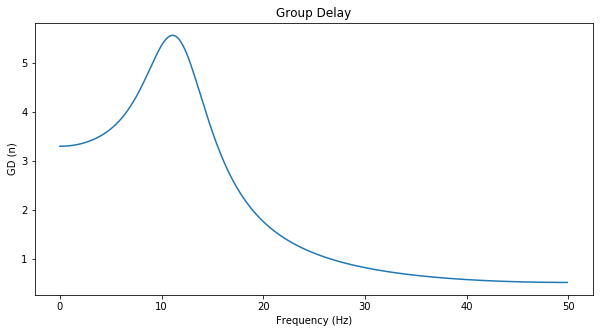

In [16]:
wgd, groupDelay = sg.group_delay((b,a))
plt.figure(figsize = (10,5))
plt.plot(50*wgd/np.pi, groupDelay)
plt.ylabel('GD (n)')
plt.title('Group Delay')
plt.xlabel('Frequency (Hz)')


Text(0.5,0,'Samples [n]')

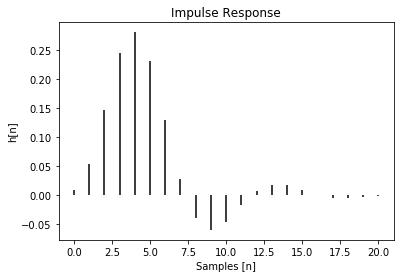

In [17]:
ni = np.arange(21)
xi = sg.unit_impulse(ni.shape)
hi = sg.lfilter(b,a,xi)
plt.vlines(ni,0,hi)
plt.title('Impulse Response')
plt.ylabel('h[n]')
plt.xlabel('Samples [n]')

Text(0.5,1,'Window Filtered')

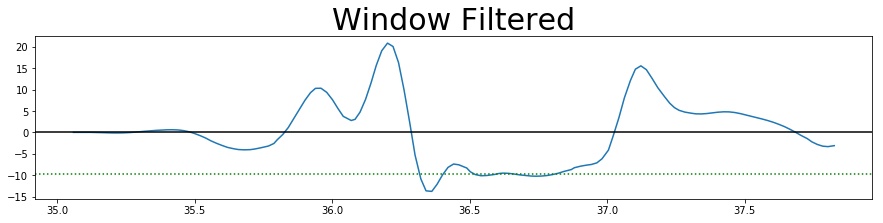

In [18]:
window = sg.get_window('blackman', 15)
blackmanfil = sg.convolve(a1, window/window.sum(), mode = 'same')
plt.figure(figsize = (15,3))
plt.plot(t1,blackmanfil)
plt.axhline(linestyle = '-', color = 'k')
plt.axhline(-9.8,linestyle = ':', color = 'g')
plt.title('Window Filtered', fontsize = 30)

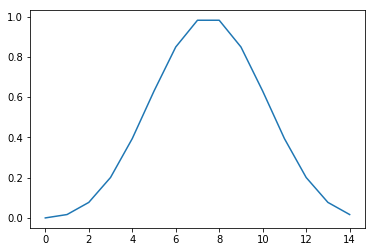

In [19]:
plt.plot(window)

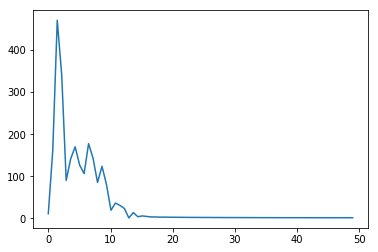

In [20]:
blackmanfft = fft.fft(blackmanfil)
#freq = fft.fftfreq(a1.size, d = 1/(2*fs))
plt.plot(freq[0:int(len(freq)/2)], abs(blackmanfft[0:int(len(blackmanfft)/2)]))
